# Workshop 3

## Training a sentiment analysis classifier based on supervised machine learning algorithm

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import nltk

import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
stop_words = set(stopwords.words('spanish'))

In [3]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

## Loading labeled tweets

In [4]:
tweets_data_frame = pd.read_csv('./data/medellin_tweets_labeled+.csv', sep = ',')

In [5]:
tweets_data_frame.head()

,full_text,sentiment
0,@hugouribev: @isamg6 @MOinternationa @petrogus...,0
1,"@maridelas18: Fueraaa, Petro de Medellín",0
2,@MunozEnith: Medellín se lució hoy. El repudio...,0
3,@isamg6: La historia contará que en Medellín s...,0
4,@funurbiano: Los del asalto a la fundidora de ...,0


In [6]:
tweets_data_frame['sentiment'].value_counts(dropna = False)

0    751
1    647
Name: sentiment, dtype: int64

In [7]:
tweets_data_frame['sentiment'].value_counts(dropna = False, normalize = True)

0    0.537196
1    0.462804
Name: sentiment, dtype: float64

## Leaving out unlabeled texts, this data is not useful for training or validating a supervised model

In [8]:
tweets_labeled_data_frame = tweets_data_frame.loc[tweets_data_frame['sentiment'].notnull()]

In [9]:
tweets_labeled_data_frame.shape

(1398, 2)

In [10]:
tweets_not_labeled_data_frame = tweets_data_frame.loc[tweets_data_frame['sentiment'].isnull()]

In [11]:
tweets_not_labeled_data_frame.shape

(0, 2)

In [12]:
features = tweets_labeled_data_frame['full_text']

In [13]:
features # features set consist of tweets only

0       @hugouribev: @isamg6 @MOinternationa @petrogus...
1                @maridelas18: Fueraaa, Petro de Medellín
2       @MunozEnith: Medellín se lució hoy. El repudio...
3       @isamg6: La historia contará que en Medellín s...
4       @funurbiano: Los del asalto a la fundidora de ...
                              ...                        
1393    @Tigo_Colombia El peor prestador de servicios ...
1394    @wib2103: Los centros comerciales en Medellín....
1395    Medellín volvió al pasado, balaceras y caos. E...
1396    Así comenzó uno de los asaltos más espectacula...
1397    Homenaje al sociólogo Alberto Mayor Mora quien...
Name: full_text, Length: 1398, dtype: object

In [14]:
labels = tweets_labeled_data_frame['sentiment']

In [15]:
labels # y set consist in the tweet sentiment to predict

0       0
1       0
2       0
3       0
4       0
       ..
1393    0
1394    1
1395    0
1396    0
1397    1
Name: sentiment, Length: 1398, dtype: int64

## Using regular expressions to clean data

In [16]:
processed_features = []

for sentence in range(0, len(features)):
    #Remove all the special characters
    processed_feature = re.sub(r'\W', ' ',   features[sentence])
    
    # Remove all single characters
    processed_feature = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    
    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    
    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    
    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', ' ', processed_feature)
    
    # Converting to lowecase
    processed_feature = processed_feature.lower()
    
    processed_features.append(processed_feature)

## Splitting train and test datasets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.05, random_state=0)

In [18]:
X_train.shape

(1328,)

In [19]:
pd.Series(y_train).value_counts(normalize = True)

0    0.536898
1    0.463102
Name: sentiment, dtype: float64

In [20]:
X_test.shape

(70,)

In [21]:
pd.Series(y_test).value_counts(normalize = True)

0    0.542857
1    0.457143
Name: sentiment, dtype: float64

## Vectorizing features training tweets

<table>
    <tbody>
        <tr>
            <td>
                <h4>Bag of Words</h4>
                <img src="./imgs/bow.png" style="width: 500px;">
            </td>
            <td>
                <h4>TF-IDF</h4>
                <img src="./imgs/tf-idf.png" style="width: 500px;">
            </td>
        </tr>
    </tbody>
</table>

In [22]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [23]:
X_tfidf = tfidf.fit_transform(X_train)

## Keep this information in mind to interpret the results obtained below

<table>
    <tbody>
        <tr>
            <td>
                <img src="./imgs/confusion-matrix.png" style="height: 400px;">
            </td>
            <td>
                <img src="./imgs/precision-recall.png" style="height: 600px;">
            </td>
        </tr>
    </tbody>
</table>

# Training and evaluating a model using Random Forest Classifier
##### max_depth: 3
##### n_estimators: 100

In [24]:
text_classifer = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
text_classifer.fit(X_tfidf, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [25]:
y_train_tfidf_prediction = text_classifer.predict(X_tfidf)
y_test_tfidf_prediction = text_classifer.predict(tfidf.transform(X_test))

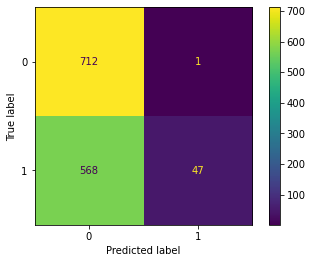

In [26]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_prediction)

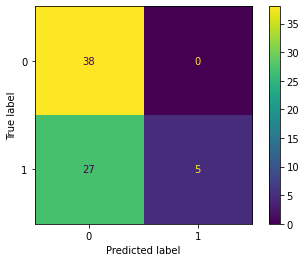

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_prediction)

In [28]:
print('Precision:', precision_score(y_test, y_test_tfidf_prediction, average='weighted', labels=np.unique(y_test_tfidf_prediction)))
print('Recall:', recall_score(y_test, y_test_tfidf_prediction, average='weighted', labels=np.unique(y_test_tfidf_prediction)))
print('F1:', recall_score(y_test, y_test_tfidf_prediction, average='weighted', labels=np.unique(y_test_tfidf_prediction)))

Precision: 0.7745054945054946
Recall: 0.6142857142857143
F1: 0.6142857142857143


# Training and evaluating a model using Random Forest Classifier
##### max_depth: 6
##### n_estimators: 200

In [29]:
text_classifer = RandomForestClassifier(max_depth=6, n_estimators=200, random_state=0)
text_classifer.fit(X_tfidf, y_train)

RandomForestClassifier(max_depth=6, n_estimators=200, random_state=0)

In [30]:
y_train_tfidf_prediction = text_classifer.predict(X_tfidf)
y_test_tfidf_prediction = text_classifer.predict(tfidf.transform(X_test))

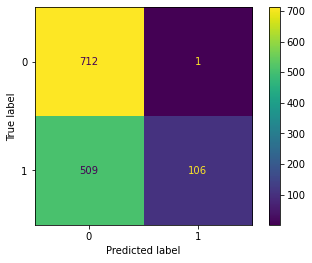

In [31]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_prediction)

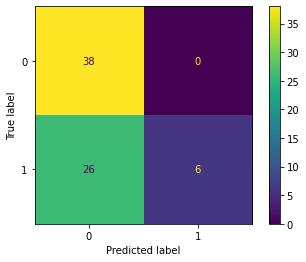

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_prediction)

In [33]:
print('Precision:', precision_score(y_test, y_test_tfidf_prediction, average='weighted', labels=np.unique(y_test_tfidf_prediction)))
print('Recall:', recall_score(y_test, y_test_tfidf_prediction, average='weighted', labels=np.unique(y_test_tfidf_prediction)))
print('F1:', recall_score(y_test, y_test_tfidf_prediction, average='weighted', labels=np.unique(y_test_tfidf_prediction)))

Precision: 0.7794642857142857
Recall: 0.6285714285714286
F1: 0.6285714285714286


# Training and evaluating a model using Random Forest Classifier
##### max_depth: 9
##### n_estimators: 300

In [34]:
text_classifer = RandomForestClassifier(max_depth=9, n_estimators=300, random_state=0)
text_classifer.fit(X_tfidf, y_train)

RandomForestClassifier(max_depth=9, n_estimators=300, random_state=0)

In [35]:
y_train_tfidf_prediction = text_classifer.predict(X_tfidf)
y_test_tfidf_prediction = text_classifer.predict(tfidf.transform(X_test))

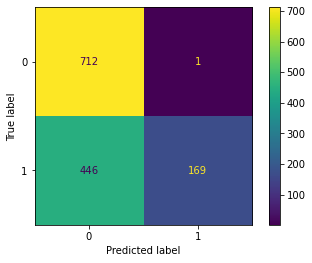

In [36]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_prediction)

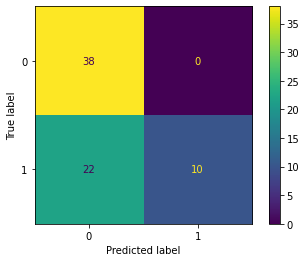

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_prediction)

In [38]:
print('Precision:', precision_score(y_test, y_test_tfidf_prediction, average='weighted', labels=np.unique(y_test_tfidf_prediction)))
print('Recall:', recall_score(y_test, y_test_tfidf_prediction, average='weighted', labels=np.unique(y_test_tfidf_prediction)))
print('F1:', recall_score(y_test, y_test_tfidf_prediction, average='weighted', labels=np.unique(y_test_tfidf_prediction)))

Precision: 0.8009523809523809
Recall: 0.6857142857142857
F1: 0.6857142857142857
